In [1]:
# Задание 4: Решение алгебр. уравнений 3й степени

Должны привести уравнение к виду:
$$x^3 + a\cdot x^2 + b\cdot x + c = 0$$
Сделать замену:
$x = z - \frac{a}{3}$
Получим:
$$z^3 + p\cdot z + q = 0$$
Вычисляем:
$$u = \left(-\frac{q}{2} + \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$
$$v = \left(-\frac{q}{2} - \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$

Берем u1 (где u1 -  какое-то значение u)<br>
v1 вычисляем из $3\cdot u\cdot v + p = 0$<br>
Вычисляем $\varepsilon = -1/2 + i\cdot\frac{\sqrt{3}}{2}$
<br><br>
Корни z:<br>
$z1 = u1 + v1$<br>
$z2 = u1\cdot \varepsilon + v1\cdot \varepsilon^2$<br>
$z3 = v1\cdot \varepsilon + u1\cdot \varepsilon^2$<br>
<br><br>
И далее возвращаемся к замене $x = z - \frac{a}{3}$


x^3 - 5*x^2 + 8*x - 6

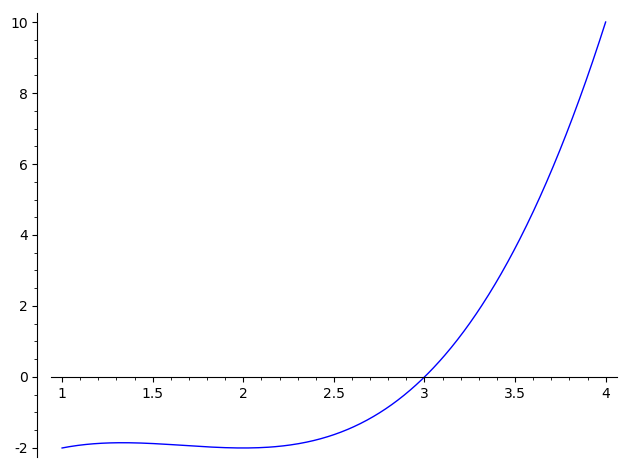

In [1]:
poly_x = x**3 - 5*x**2 + 8*x - 6
show(poly_x)
plot(poly_x, (x, 1, 4))

In [3]:
# poly_x *= 4
# show(poly_x)

Сделаем замену x = z - a/3

у нас a = -5<br>
Отсюда: x = z - (a/3) = z + 5/3

In [2]:
var("z")
poly_z = poly_x(x = z + 5/3)

In [3]:
poly_z

1/27*(3*z + 5)^3 - 5/9*(3*z + 5)^2 + 8*z + 22/3

In [4]:
show(poly_z.expand().simplify())

z^3 - 1/3*z - 52/27

$z^3 + p\cdot z + q = 0$<br>
Отсюда:<br>
$p = -1/3$<br>
$q = -52/27$

In [5]:
pq = {'p': -1/3, 'q': -52/27}

Вычисляем:
$$u = \left(-\frac{q}{2} + \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$
$$v = \left(-\frac{q}{2} - \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$

In [6]:
def safe_cubic_root(_in_param):
    if _in_param.imag():
        # sgn для комплексного числа выдаст ошибку в дальнейшем, когда будет вызван numerical_approx
        # поэтому придется просто возводить в степень
        return (_in_param)**(1/3)
    else:
        return sgn(_in_param)*(abs(_in_param)**(1/3))

In [7]:
var("p q da")
# da - выносим отдельно и объявляем _после_ формул "u" и "v"
# потому как так отлаживать удобнее
u_pre = -q/2 + sqrt(da)
v_pre = -q/2 - sqrt(da)
da = q**2/4 + p**3/27

In [8]:
show(da)

1/27*p^3 + 1/4*q^2

Берем u1 (где u1 -  какое-то значение u)<br>

In [9]:
show("da = ", da(**pq))
u1 = safe_cubic_root(u_pre(**pq, da=da(**pq)))
show("u1 = ", u1.n(digits=4))

'da = ' 25/27

'u1 = ' 1.244

In [10]:
u1_2 = safe_cubic_root(u_pre(**pq, da=da(**pq)))
show("u1_2 = ", u1_2.n(digits=4))

'u1_2 = ' 1.244

v1 вычисляем из $3\cdot u\cdot v + p = 0$<br>

In [11]:
v1=safe_cubic_root(v_pre(**pq, da=da(**pq)))
show(v1)
show(v1.n(digits=4))

abs(-5/3*sqrt(1/3) + 26/27)^(1/3)

0.08919

In [12]:
v1_2 = v_pre(**pq, da=da(**pq))**(1/3)
show(v1_2.n(digits=4))

0.08919

In [13]:
# ! здесь было просто 
# v1_func = -p/(3*u)
# что приводило сразу к символьному расчету на месте, вместо создания функции и затем пересчета значения
def v1_func(_p, _u):
    return -_p/(3*_u)

v1 = v1_func(_p=pq['p'], _u=u1_2)
show(v1)
show(v1.n(digits=4))

1/3/(45*sqrt(1/3) + 26)^(1/3)

0.08932

Вычисляем $\varepsilon = -1/2 + i\cdot\frac{\sqrt{3}}{2}$

In [14]:
Eps = -1/2 + (sqrt(-3))/2
show(Eps)

1/2*sqrt(-3) - 1/2

Корни z:<br>
$z1 = u1 + v1$<br>
$z2 = u1\cdot \varepsilon + v1\cdot \varepsilon^2$<br>
$z3 = v1\cdot \varepsilon + u1\cdot \varepsilon^2$<br>

In [15]:
z = [u1 + v1
     , u1*Eps + v1*Eps**2
     , v1*Eps + u1*Eps**2
    ]

for i, zi in enumerate(z):
    show(f"z{i} = ", zi.simplify())

for i, zi in enumerate(z):
    show(f"z{i} = ", zi.n(digits=4))

'z0 = ' 1/3*(15*sqrt(3) + 26)^(1/3) + 1/3/(15*sqrt(3) + 26)^(1/3)

'z1 = ' 1/12*(I*sqrt(3) - 1)^2/(15*sqrt(3) + 26)^(1/3) + 1/6*(15*sqrt(3) + 26)^(1/3)*(I*sqrt(3) - 1)

'z2 = ' 1/12*(15*sqrt(3) + 26)^(1/3)*(I*sqrt(3) - 1)^2 + 1/6*(I*sqrt(3) - 1)/(15*sqrt(3) + 26)^(1/3)

'z0 = ' 1.333

'z1 = ' -0.6667 + 1.000*I

'z2 = ' -0.6667 - 1.000*I

Теперь ищем D, чтобы сверить, какие корни получились, какие должны быть и пр.:<br>
D < 0: 1 действительный, два комплексных корня<br>
D == 0: три действительных корня, два из них равные<br>
D > 0 - три действительных и различных

In [16]:
D = -4*p**3 - 27*q**2

In [18]:
D(**pq)

-100

Вернемся к подстановке: x = z - a/3

In [19]:
a = -5


def from_z_to_x(_z, _a):
    return _z - _a/3


def from_z_to_x(_z, _a):
    return _z - _a/3


for i, zi in enumerate(z):
    xi = from_z_to_x(_z=zi, _a=a)
    show(f"x{i} = ", xi.n(digits=4))

'x0 = ' 3.000

'x1 = ' 1.000 + 1.000*I

'x2 = ' 1.000 - 1.000*I

In [20]:
var("x")
sols = solve(poly_x(), x)
for i, sol in enumerate(sols):
    show(f"x{i} = ", sol.rhs().n(digits=4))

'x0 = ' 1.000 - 1.000*I

'x1 = ' 1.000 + 1.000*I

'x2 = ' 3.000